# TELCO CUSTOMER CHURN

### Created By : Faza Syafri Nur Rahman 



# **1. Business Problem Understanding**

## Context  
Sebuah perusahaan yang bergerak di bidang Konsultan Data diminta oleh perusahaan telekomunikasi untuk menganalisa data mereka. Perusahaan telekomunikasi tersebut ingin mengetahui pelanggan mana saja yang akan berpindah ke telekomunikasi pesaing / perusahaan lain (Churn). Tujuan mereka adalah agar perusahaan dapat mengurangi tingkat pelanggan berpindah ke perusahaan lain serta mempertahankan pelanggan dengan membuat pelanggan loyal dan juga mengurangi cost dimana mencari pelanggan baru membutuhkan biaya yang lebih besar dibandingkan memberikan promo (Retention).

Target :

0 : Pelanggan tidak berhenti menggunakan layanan

1 : Pelanggan berhenti menggunakan layanan

Pada dataset yang diberikan perusahaan, berisikan data yang mewakili profil pelanggan yang telah meninggalkan perusahaan telekomunikasi. Churn di telekomunikasi dan layanan berbasis langganan lainnya berarti situasi ketika pelanggan meninggalkan penyedia layanan.

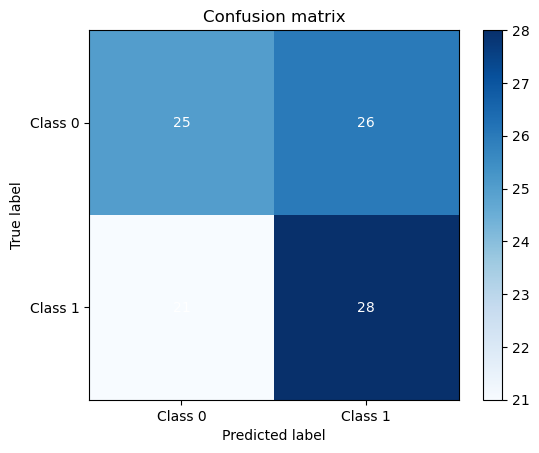

In [67]:
# generate some example data
y_true = np.random.randint(0, 2, size=100)
y_pred = np.random.randint(0, 2, size=100)

# compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# add annotations to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# save plot to file
plt.savefig('confusion_matrix.png')

# display plot in notebook
plt.show()

## Problem Statement :

Proses untuk mendapatkan pelanggan baru 5 kali lebih mahal daripada mempertahankan pelanggan yang sudah ada, dan membuat pelanggan baru menjadi loyal juga 16 kali lebih mahal. Perusahaan memerlukan strategi untuk mengurangi atau bahkan menghentikan churn (kehilangan pelanggan) dan meretensi pelanggan yang sudah ada, karena pelanggan merupakan sumber utama revenue perusahaan.

berdasarkan informasi yang didapatkan, rata-rata biaya customer acquisition cost untuk industri telekomunikasi adalah sekitar $315 per pelanggan baru.(sumber : https://www.revechat.com/blog/customer-acquisition-cost/)

Perusahaan dapat memberikan insentif seperti diskon atau promo seperti paket yang menarik kepada pelanggan mereka untuk mempertahankan pelanggan. Namun hal ini akan sia sia jika kita memberikan insentif ini kepada pelanggan yang akan churn. sama halnya jika insentif juga diberikan secara merata maka perusahaan juga akan mengeluarkan banyak cost yang tidak efektif dan mengurangi pendapatan mereka.

Jika perusahaan sudah mengeluarkan biaya besar untuk marketing mereka untuk mendapatkan pelanggan baru namun ternyata pelanggan baru itu churn maka perusahaan juga akan mengeluarkan lebih banyak uang dibandingkan memberikan insentif ke pelanggan mereka.

## Goals :

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan/ingin berhenti dan meninggalkan layanan mereka atau tidak, sehingga dapat fokus pada pelanggan yang bersedia untuk tetap menggunakan layanan perusahaan tersebut.

Dan juga, perusahaan ingin mengetahui faktor atau variabel apa yang membuat seorang pelanggan tetap setia dengan mereka atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati kandidat pelanggan potensial.

## Analytic Approach :

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan tetap menggunakan layanan perusahaan dan yang akan meninggalkan / berhenti.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan/ingin tetap berlangganan dengan perusahaan tersebut atau meninggalkannya.

## Metric Evaluation

Type 1 error : False Positive  
Konsekuensi: kehilangan pelanggan potensial dan juga insentif yang dikeluarkan.

Type 2 error : False Negative  
Konsekuensi: kehilangan pelanggan dan juga kerugian akan segala biaya yang baik yang diterima ataupun yang dikeluarkan untuk pelanggan, selain itu juga perusahaan harus mengeluarkan biaya lagi untuk mencari pelanggan baru. 

biaya untuk mencari pelanggan baru = $315
biaya untuk memberikan retensi = 1/5 * $315 = $63

sumber : https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost untuk pelanggan yang tidak setia dari perusahaan tersebut, tetapi tanpa membuat menjadi kurangnya pelanggan setia perusahaan. Jadi kita ingin sebanyak mungkin prediksi kelas negatif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah F2 Score karena recall kita anggap dua kali lebih penting daripada precision.

# **2. Library**

In [1]:
# Library

import numpy as np 
import pandas as pd

# Visualization

import seaborn as sns
import matplotlib.pyplot as plt
import missingno 
%matplotlib inline

# Preprocessing
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# traintest split
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline_Imba

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
import lightgbm as lgb

# Evaluation Metric
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve, confusion_matrix, fbeta_score, make_scorer

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# save pickle
from inspect import getblock
import pickle

# Set max columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Warning
import warnings
warnings.filterwarnings('ignore')

# **3. Data Understanding**

Dataset Source : https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp

Note : 
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategorikal (Nominal, Ordinal, Binary)
- Setiap baris data merepresentasikan informasi seorang pelanggan yang berlangganan dimasa lalu
- Target pada data ini adalah Churn

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Object | Pelanggan memiliki tanggungan atau tidak |
| tenure | int64 | Jumlah bulan pelanggan telah berlangganan bersama perusahaan |
| OnlineSecurity | Object | Pelanggan memiliki keamanan online atau tidak |
| OnlineBackup | Object | Pelanggan memiliki salinan online atau tidak |
| InternetService | Object | Klien berlangganan layanan Internet atau tidak |
| DeviceProtection | Object | Klien memiliki perlindungan perangkat atau tidak |
| TechSupport | Object | Klien memiliki dukungan teknis atau tidak |
| Contract | Object | Jenis kontrak menurut durasi |
| PaperlessBilling | Object | Tagihan diterbitkan dalam bentuk tanpa kertas |
| MonthlyCharges | float64 | Jumlah biaya untuk layanan pada basis bulanan |
| Churn | Object | Pelanggan berhenti menggunakan layananmu atau tidak |

In [2]:
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [5]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [6]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


# **4. Data Cleaning**

## Missing Value

Pada tahapan ini kita akan melihat apakah terdapat data kosong dan data duplikat dari data yang kita miliki

In [7]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

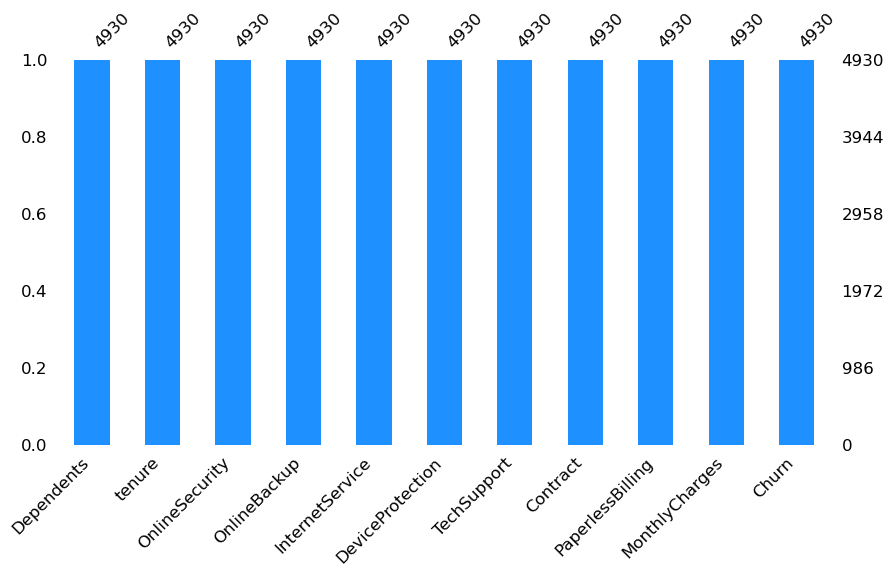

In [8]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<AxesSubplot: >

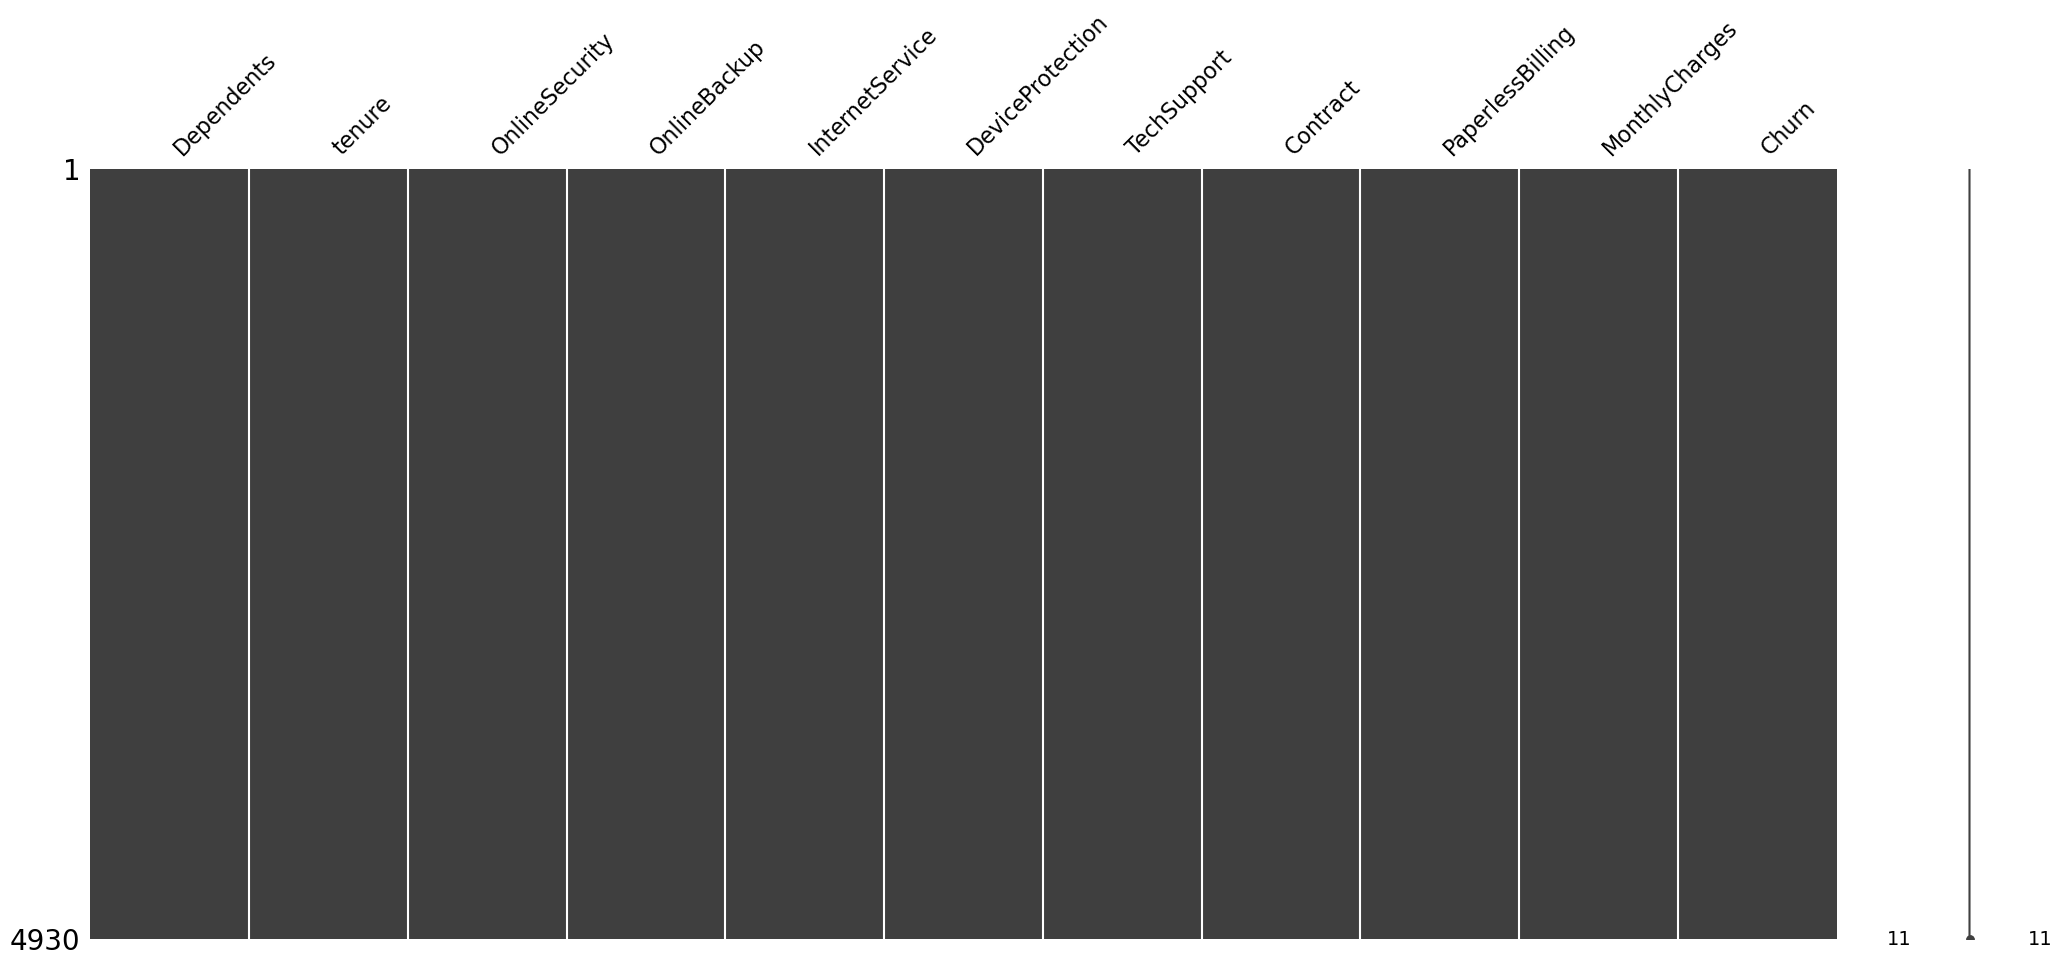

In [9]:
missingno.matrix(df)

Terlihat dari visualisasi diatas, bahwa tidak ada kolom yang memiliki missing value / data yang hilang. Hal ini terlihat juga di matrix bahwa tidak ada data yang hilang.

## Data Duplicate

pada bagian ini kita akan melihat apakah data kita memiliki data duplikat atau tidak

In [10]:
df.duplicated().sum()

77

In [11]:
df[df.duplicated()]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
1294,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.85,Yes
1430,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,74.45,Yes
1513,No,2,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.65,No
1620,No,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,No,115.15,No
1881,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.60,Yes


terdapat data yang duplikat di data kita, selanjutnya data duplikat tersebut akan kita hapus

In [12]:
df = df.drop_duplicates()

setelah kita drop, maka kita cek kembali apakah data duplikat tersebut sudah tidak ada.

In [13]:
df.duplicated().sum()

0

Data duplikat sudah tidak ada, lalu kita cek kembali secara keseluruhan

In [14]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].min(), df[col].max(), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'max', 'min', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,max,min,null,nullPct,unique,uniqueSample
0,Dependents,object,No,Yes,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,72,0,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,object,No,Yes,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,No,Yes,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,DSL,No,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,No,Yes,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,No,Yes,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,Month-to-month,Two year,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,No,Yes,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,18.8,118.65,0,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


Summary:

* Pada data ini terdapat data Missing Value, sudah dilakukan pembersihan sehingga tidak terdapat Missing Value atau data yang hilang.

* Terdapat data duplikat di data ini, sudah dilakukan pembersihan sehingga tidak ada lagi data yang duplikat.

# **5. Simple EDA**

In [15]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

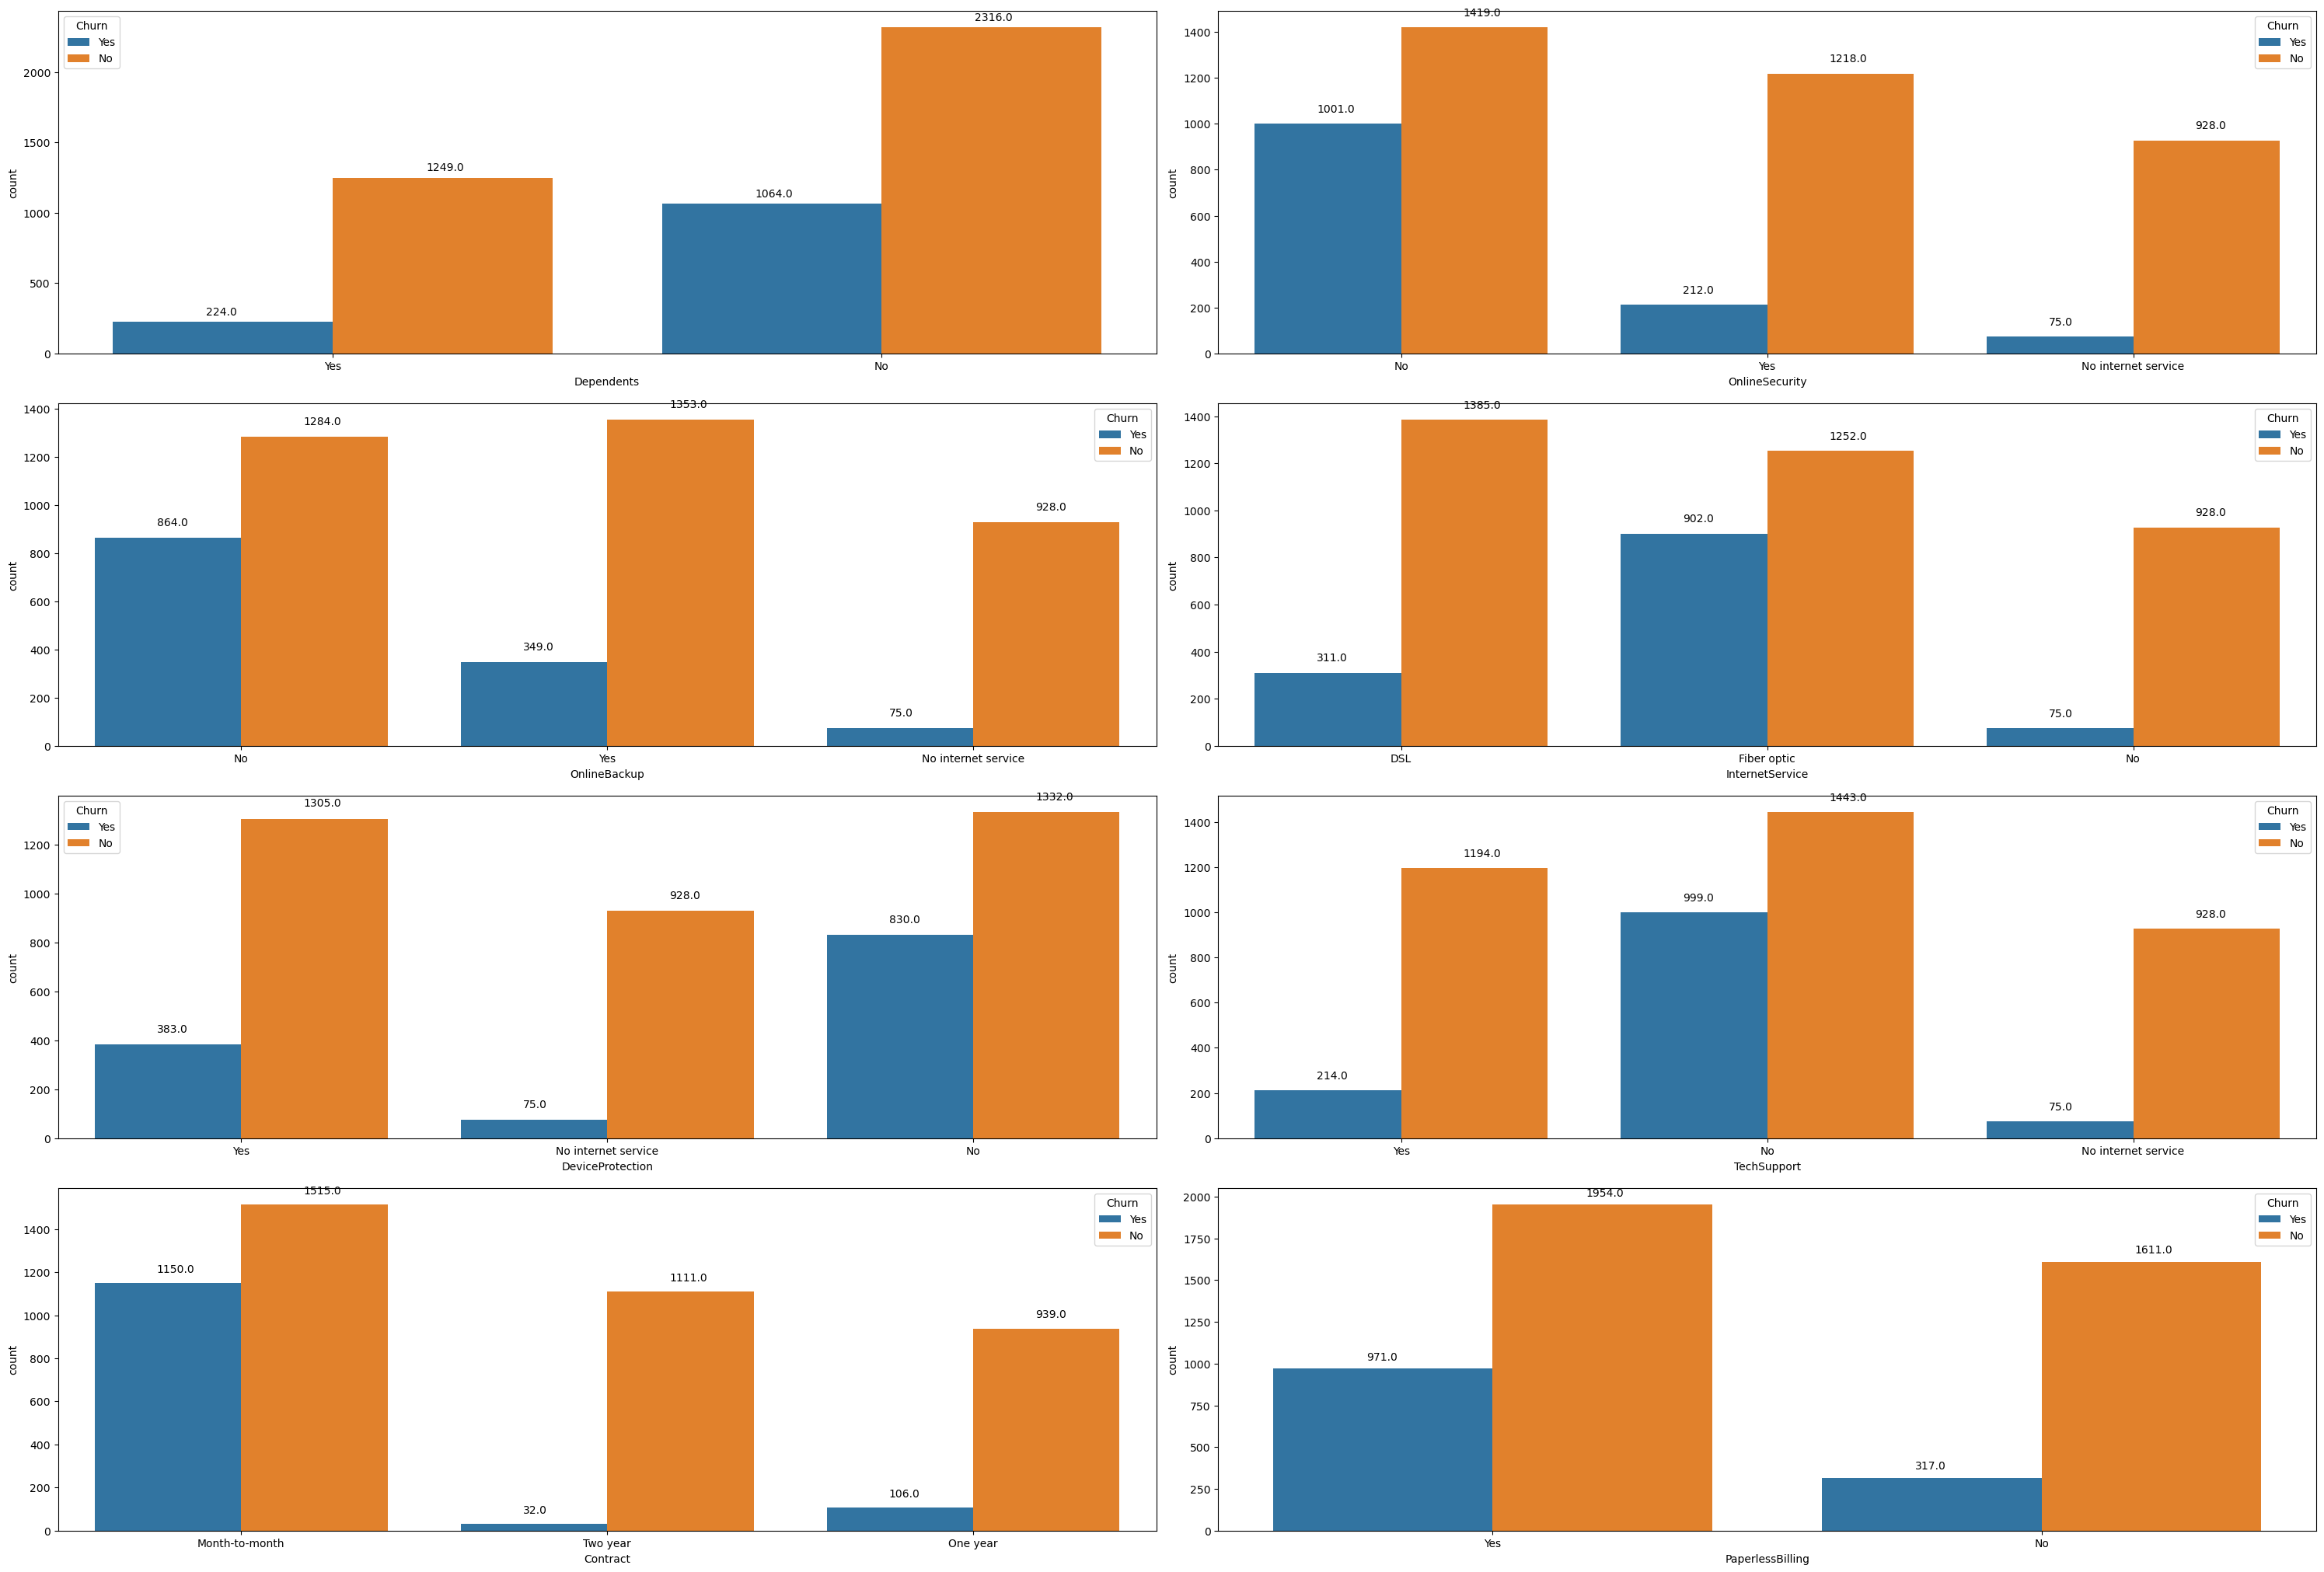

In [16]:
count = 0
fig = plt.figure(figsize=(30,30))

kolom = df.drop(columns=['tenure', 'MonthlyCharges', 'Churn'])

for i in kolom:
    count +=1
    ax= plt.subplot(6,2,count)
    sns.countplot(data = df, x = df[i], hue = 'Churn')

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+50))
        
    fig.tight_layout()
    plt.xticks(rotation=0)

plt.show()

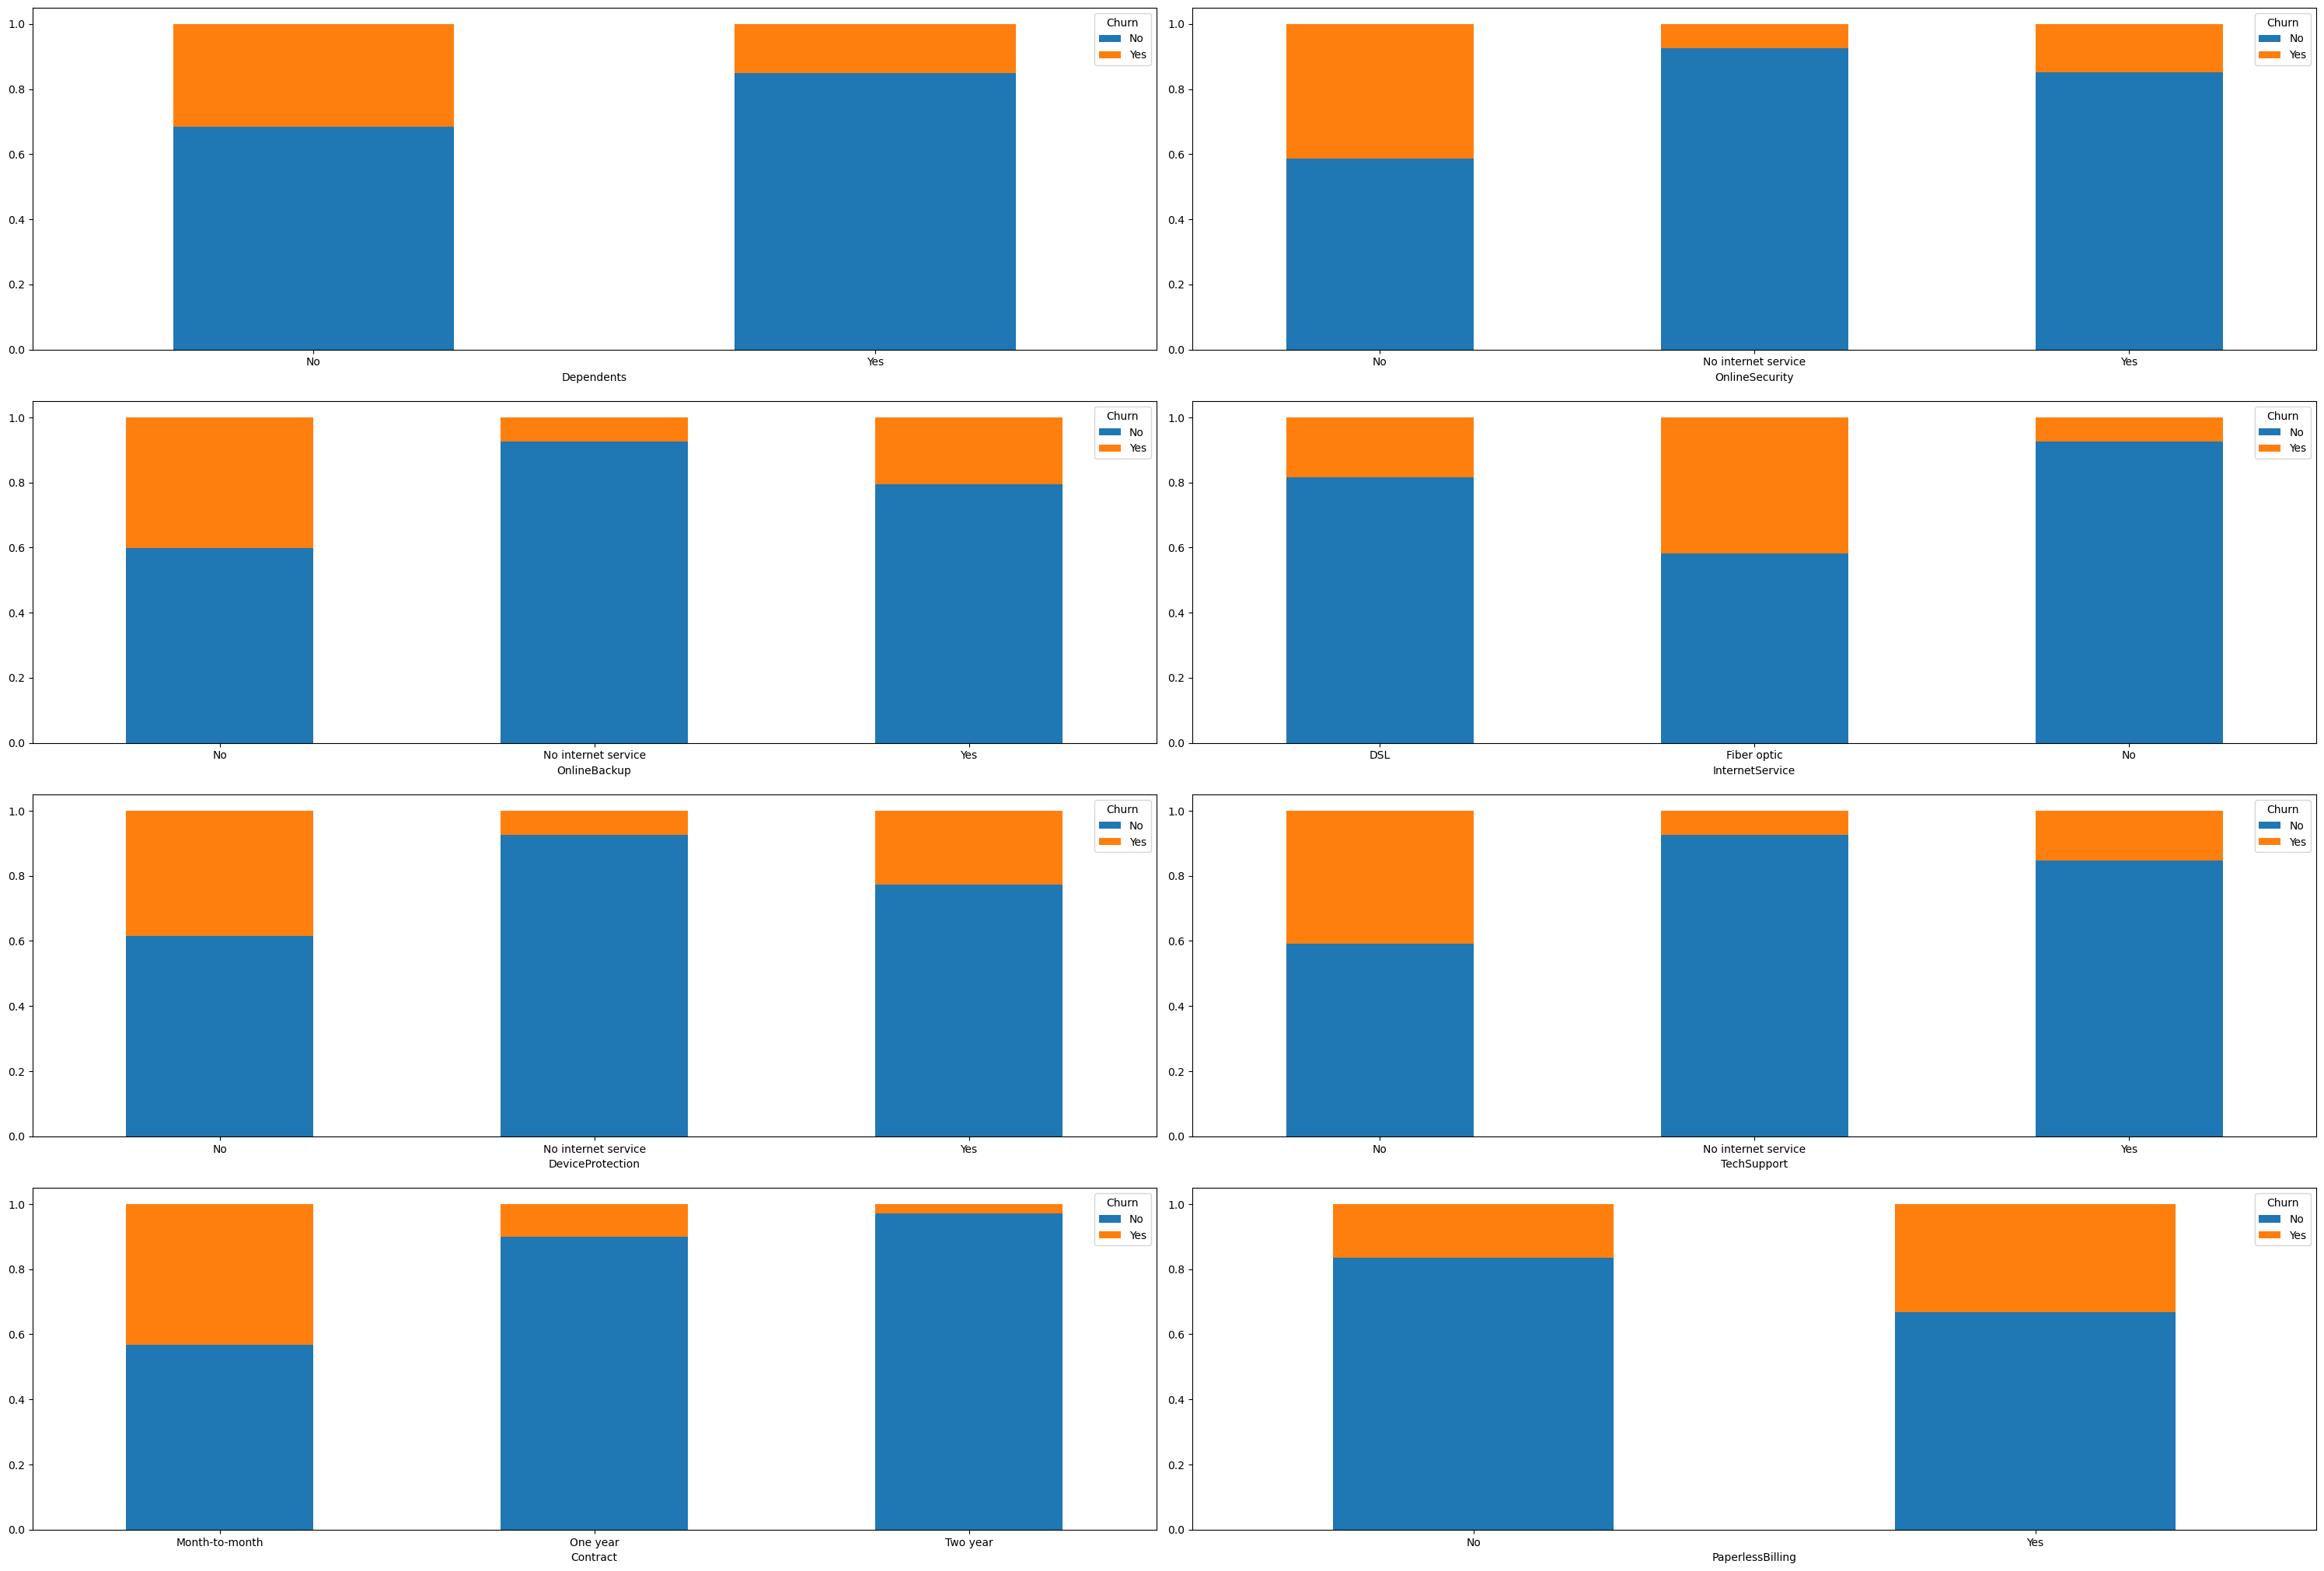

In [17]:
count = 0
fig = plt.figure(figsize=(30,30))

kolom = df.drop(columns=['tenure', 'MonthlyCharges', 'Churn'])

for i in kolom:
    count +=1
    ax= plt.subplot(6,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()
    plt.xticks(rotation=0)

plt.show()

In [18]:
for i in df.drop(columns=['tenure', 'MonthlyCharges', 'Churn']).columns:
    df_churn = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(df_churn.sort_values(by=['Yes'], ascending=False))

Churn,No,Yes
Dependents,,
No,0.685207,0.314793
Yes,0.847929,0.152071


Churn,No,Yes
OnlineSecurity,,
No,0.586364,0.413636
Yes,0.851748,0.148252
No internet service,0.925224,0.074776


Churn,No,Yes
OnlineBackup,,
No,0.597765,0.402235
Yes,0.794947,0.205053
No internet service,0.925224,0.074776


Churn,No,Yes
InternetService,,
Fiber optic,0.581244,0.418756
DSL,0.816627,0.183373
No,0.925224,0.074776


Churn,No,Yes
DeviceProtection,,
No,0.616096,0.383904
Yes,0.773104,0.226896
No internet service,0.925224,0.074776


Churn,No,Yes
TechSupport,,
No,0.590909,0.409091
Yes,0.848011,0.151989
No internet service,0.925224,0.074776


Churn,No,Yes
Contract,,
Month-to-month,0.568480,0.431520
One year,0.898565,0.101435
Two year,0.972003,0.027997


Churn,No,Yes
PaperlessBilling,,
Yes,0.668034,0.331966
No,0.835581,0.164419


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :
1. Pelanggan yang tidak memiliki tanggungan / `Dependents` lebih cenderung untuk churn.
2. Pelanggan yang tidak berlangganan `OnlineSecurity` lebih cenderung untuk churn dibandingkan yang lain.
3. Pelanggan yang tidak berlangganan `OnlineBackup` lebih cenderung Churn dibandingkan yang lain.
4. Pelanggan yang `InternetService`nya **Fiber Optic** lebih cenderung untuk Churn dibandingkan `InternetService` yang lain.
5. Pelanggan yang tidak berlangganan `DeviceProtection` lebih cenderung Churn dibandingkan yang lain.
6. Pelanggan yang tidak berlangganan `TechSupport` lebih cenderung Churn dibandingkan yang lain.
7. Pelanggan yang `Contract`nya **Month-to-month** lebih cenderung churn dibandingkan yang lain.
8. Pelanggan yang berlangganan `PaperlessBilling` lebih cenderung Churn dibandingkan yang lain.

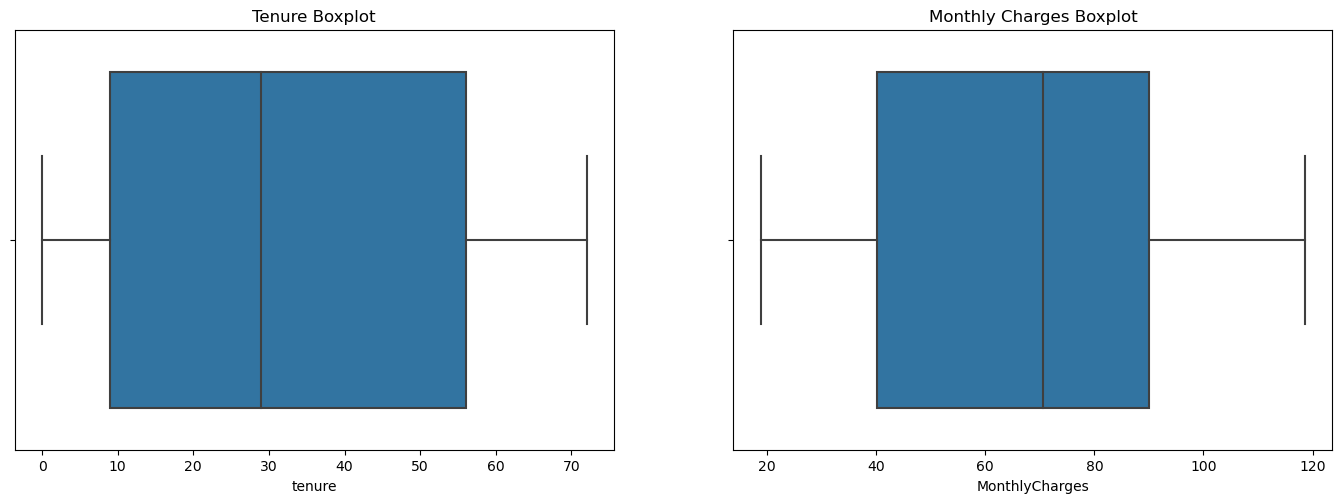

In [19]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df, x='tenure')
plt.title('Tenure Boxplot')

plt.subplot(222)
sns.boxplot(data=df, x='MonthlyCharges')
plt.title('Monthly Charges Boxplot')
plt.show()


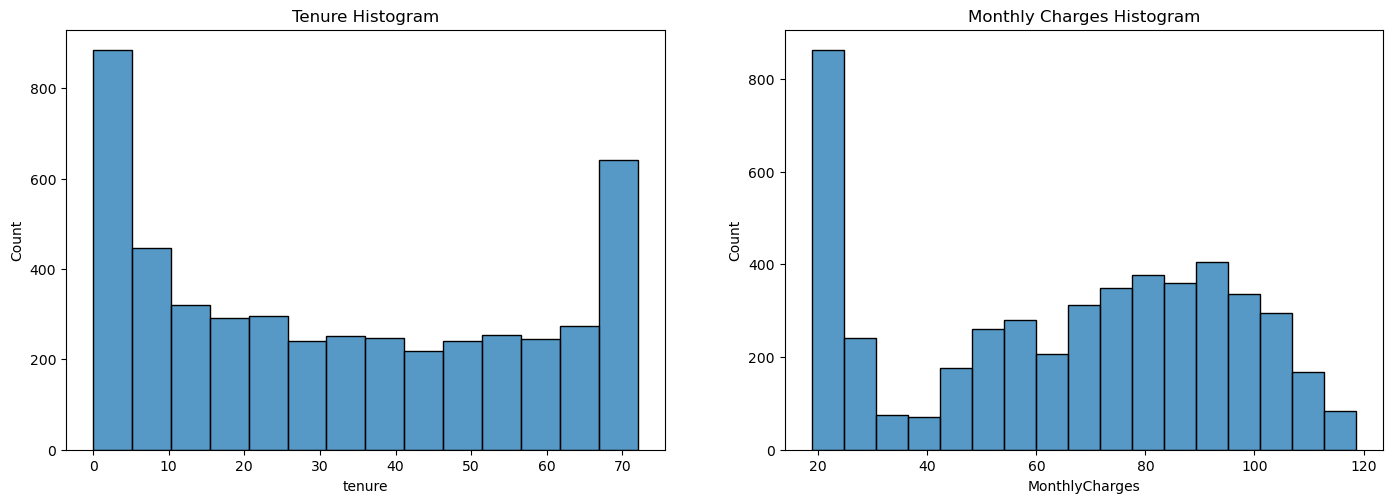

In [20]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df, x='tenure')
plt.title('Tenure Histogram')

plt.subplot(222)
sns.histplot(data=df, x='MonthlyCharges')
plt.title('Monthly Charges Histogram')
plt.show()


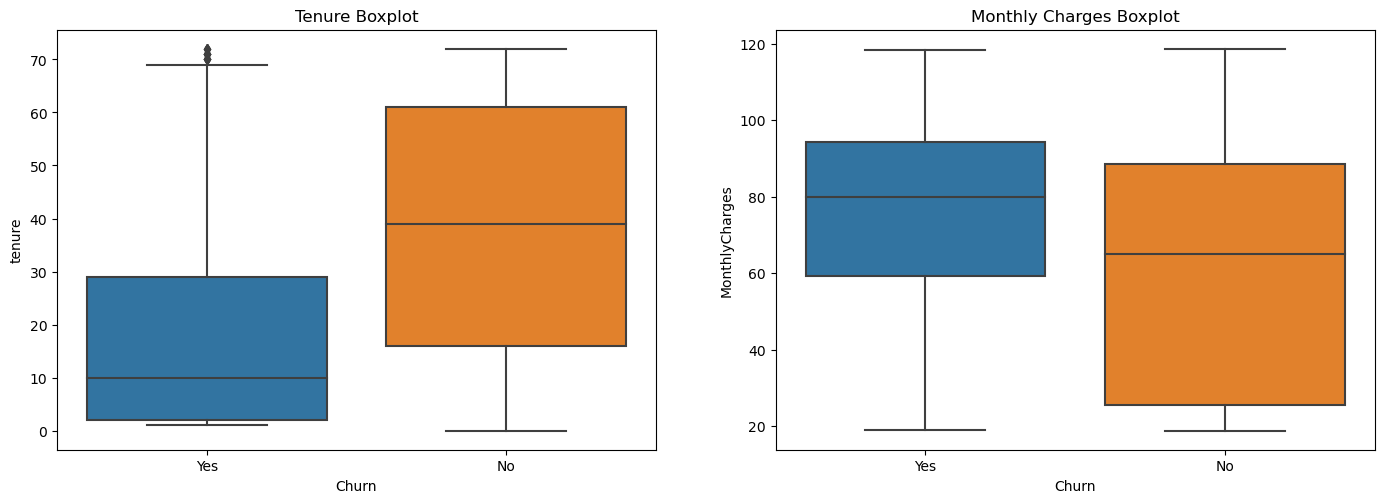

In [21]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df, y='tenure', x='Churn')
plt.title('Tenure Boxplot')

plt.subplot(222)
sns.boxplot(data=df, y='MonthlyCharges', x='Churn')
plt.title('Monthly Charges Boxplot')

plt.show()


Berdasarkan boxplot diatas, kita dapat menyimpulkan bahwa tidak ada outlier pada data `tenure` dan `Monthly Charges`, lalu terlihat juga distribusinya tidak normal. 

terlihat perbedaan distribusi `tenure` dari target yang 0 (tidak churn) dan target yang 1 (yang churn). sedangkan `Monthly Charges` distribusinya yang churn (target 1) terlihat lebih tinggi dari target yang 0 (tidak churn).

<AxesSubplot: >

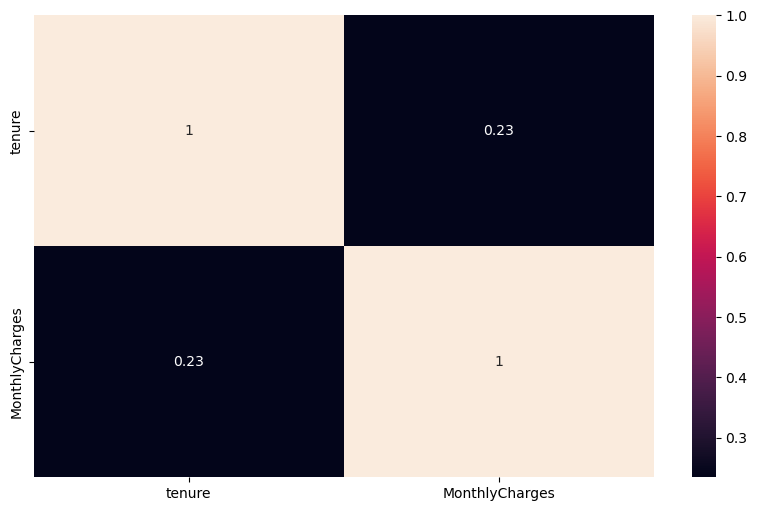

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)

Berdasarkan heatmap correlation diatas dapat disimpulkan bahwa `tenure` dan `MonthlyCharges` memiliki korelasi positif namun lemah.

# **6. Preprocessing**

In [23]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [24]:
churn_total = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'Churn','Churn':'Jumlah'})
churn_persen = pd.DataFrame(df['Churn'].value_counts()/len (df)).reset_index().rename(columns={'index':'Churn','Churn':'%'})

display(churn_total)
display(churn_persen)

,Churn,Jumlah
0,No,3565
1,Yes,1288


,Churn,%
0,No,0.734597
1,Yes,0.265403


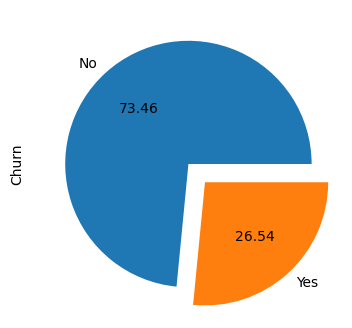

In [25]:
df['Churn'].value_counts().plot.pie(
    figsize=(4,4), 
    autopct='%.2f', # menampilkan persentase masing masing bagian, 2 angka di belakang koma
    explode=(0,0.2) # mengatur jarak antar piechart
)

plt.show()

Dapat dilihat bahwa distribusi dari target kita tidak seimbang, sehingga nanti diperlukan resample untuk menangani data yang imbalance.

selanjutnya untuk memproses machine learning kita, maka kita ubah Churn Yes dan No menjadi 1 dan 0.

In [26]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Contract'].replace({'Month-to-month': 0, 'Two year': 2, 'One year': 1})
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0


In [27]:
display(df['Churn'].value_counts())
display(df['Contract'].value_counts())

0    3565
1    1288
Name: Churn, dtype: int64

Month-to-month    2665
Two year          1143
One year          1045
Name: Contract, dtype: int64

## Split Data

In [28]:
x = df.drop(columns=['Churn'])
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2023)

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Dependents` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `OnlineSecurity` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `OnlineBackup` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `InternetService` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `DeviceProtection` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `TechSupport` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `Contract` menggunakan Ordinal Encoder, karena fitur ini adalah lama berlangganan dari pelanggan terhadap layanan telekomunikasi perusahaan.
8. Merubah fitur/kolom `PaperlessBilling` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

Dan untuk melakukan fitur scalling pada fitur - fitur numerical yang kita miliki.
Yang akan kita lakukan adalah :

1. Melakukan scaling pada fitur/kolom `tenure` menggunakan Robust Scaller, karena data pada fitur / kolom ini memiliki range yang cukup luas atau jauh.
2. Melakukan scaling pada fitur/kolom `MonhtlyCharges` menggunakan Robust Scaller, karena data pada fitur / kolom ini memiliki range yang cukup luas atau jauh.

In [29]:
transformer = ColumnTransformer(
    [
    ('OHE', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('OE', OrdinalEncoder(), ['Contract']),
    ('RS', RobustScaler(), ['tenure', 'MonthlyCharges'])
    ],remainder = 'passthrough' # jika tidak ditulis di atas nama kolomnya, tidak akan di proses
)

In [30]:
# Model

LogReg = LogisticRegression(random_state=2023)
KNN = KNeighborsClassifier()
Tree = DecisionTreeClassifier(random_state=2023)
SVM = SVC(probability=True, random_state=2023)
RF = RandomForestClassifier(random_state=2023)
XGB = XGBClassifier(random_state=2023)
LGB = lgb.LGBMClassifier(random_state=2023)
Adab = AdaBoostClassifier(random_state=2023)
GB = GradientBoostingClassifier(random_state=2023)

VC = VotingClassifier([
    ('model1', LogReg),
    ('model2', KNN),
    ('model3', Tree)
], voting='soft')

SC = StackingClassifier([
    ('model1', LogReg),
    ('model2', KNN),
    ('model3', Tree)
], final_estimator=SVM)

In [31]:
# resampling

RUS = RandomUnderSampler(random_state=2023)
ROS = RandomOverSampler(random_state=2023)
smote = SMOTE(random_state=2023)
NM = NearMiss()


# **7. Model Benchmarking**

## Default Model

In [32]:
# Looping Function Default F2 Score

models = [LogReg, KNN, Tree, SVM, RF, Adab, GB, XGB, LGB, VC, SC]
score = []
F2 = []
std = []
skfold=StratifiedKFold(n_splits=5)

# F2 score
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:
    
    pipeline = Pipeline([
                        ('preprocess', transformer),
                        ('model', i)
                        ])

    model_cv = np.round(cross_val_score(pipeline, x_train, y_train, cv=skfold, scoring=f2_score, error_score='raise', n_jobs=-1),3)
    score.append(model_cv)
    F2.append(model_cv.mean())
    std.append(model_cv.std())


fold_df_default = pd.DataFrame({
    'Model' : ['LogReg', 'KNN', 'Tree', 'SVM', 'RF', 'Adab', 'GB', 'XGB', 'LGB', 'VC', 'SC'],
    'Mean F2' : F2,
    'Std Dev' : std,
    'score' : score
}).sort_values(by='Mean F2', ascending = False)

fold_df_default

,Model,Mean F2,Std Dev,score
8,LGB,0.5372,0.016904,"[0.527, 0.515, 0.564, 0.533, 0.547]"
7,XGB,0.5348,0.018476,"[0.554, 0.54, 0.529, 0.502, 0.549]"
6,GB,0.5254,0.010575,"[0.538, 0.515, 0.526, 0.512, 0.536]"
5,Adab,0.5172,0.017151,"[0.506, 0.524, 0.548, 0.505, 0.503]"
0,LogReg,0.5096,0.016427,"[0.524, 0.522, 0.523, 0.49, 0.489]"
9,VC,0.5030,0.029631,"[0.557, 0.484, 0.471, 0.508, 0.495]"
1,KNN,0.4990,0.022900,"[0.485, 0.49, 0.53, 0.469, 0.521]"
2,Tree,0.4950,0.030783,"[0.541, 0.468, 0.47, 0.523, 0.473]"
10,SC,0.4848,0.017758,"[0.507, 0.487, 0.493, 0.484, 0.453]"
4,RF,0.4840,0.026222,"[0.502, 0.462, 0.49, 0.447, 0.519]"


Berdasarkan tabel diatas, maka model LGB dan XGB merupakan model dengan mean terbaik yaitu di angka 0.5372 dan 0.5348.

Selanjutnya kita lakukan model benchmarking menggunakan resampling

## Model With Resampling

In [33]:
# Looping Function with Resample

models = [LogReg, KNN, Tree, SVM, RF, Adab, GB, XGB, LGB, VC, SC]
resample = [RUS, ROS, smote, NM]
score = []
F2 = []
std = []
skfold=StratifiedKFold(n_splits=5)

# F2 score
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:
    for j in resample:
        pipeline = Pipeline_Imba([
                                ('preprocess', transformer),
                                ('resample', j),
                                ('model', i)
                                ])

        model_cv = np.round(cross_val_score(pipeline, x_train, y_train, cv=skfold, scoring=f2_score, error_score='raise', n_jobs=-1),3)
        score.append(model_cv)
        F2.append(model_cv.mean()) 
        std.append(model_cv.std())


fold_df_resample = pd.DataFrame({
        'Model' : ['LogReg RUS', 'LogReg ROS', 'LogReg SMOTE', 'LogReg NM', 
                'KNN RUS', 'KNN ROS', 'KNN SMOTE', 'KNN NM', 
                'Tree RUS', 'Tree ROS', 'Tree SMOTE', 'Tree NM', 
                'SVM RUS', 'SVM ROS', 'SVM SMOTE', 'SVM NM', 
                'RF RUS', 'RF ROS', 'RF SMOTE', 'RF NM', 
                'Adab RUS', 'Adab ROS', 'Adab SMOTE', 'Adab NM',
                'GB RUS', 'GB ROS', 'GB SMOTE', 'GB NM',
                'XGB RUS', 'XGB ROS', 'XGB SMOTE', 'XGB NM',
                'LGB RUS', 'LGB ROS', 'LGB SMOTE', 'LGB NM',
                'VC RUS', 'VC ROS', 'VC SMOTE', 'VC NM',
                'SC RUS', 'SC ROS', 'SC SMOTE', 'SC NM'],
        'Mean F2' : F2,
        'Std Dev' : std,
        'score' : score
}).sort_values(by='Mean F2', ascending = False)

fold_df_resample.head(10)

,Model,Mean F2,Std Dev,score
21,Adab ROS,0.7248,0.022212,"[0.742, 0.707, 0.692, 0.752, 0.731]"
20,Adab RUS,0.7188,0.016461,"[0.74, 0.696, 0.704, 0.723, 0.731]"
24,GB RUS,0.7138,0.013862,"[0.728, 0.696, 0.705, 0.708, 0.732]"
22,Adab SMOTE,0.7092,0.017993,"[0.738, 0.693, 0.701, 0.722, 0.692]"
14,SVM SMOTE,0.7070,0.013609,"[0.698, 0.699, 0.694, 0.731, 0.713]"
13,SVM ROS,0.7066,0.012076,"[0.701, 0.694, 0.697, 0.726, 0.715]"
25,GB ROS,0.7064,0.014961,"[0.715, 0.68, 0.707, 0.705, 0.725]"
12,SVM RUS,0.7048,0.011652,"[0.7, 0.696, 0.691, 0.716, 0.721]"
40,SC RUS,0.7016,0.022366,"[0.694, 0.705, 0.692, 0.675, 0.742]"
32,LGB RUS,0.6922,0.008256,"[0.698, 0.679, 0.686, 0.698, 0.7]"


Berdasarkan tabel diatas, dapat dilihat bahwa nilai rata-rata F2 tertinggi berada pada model Adaptive Boosting (Adab) dengan menggunakan resampling Random Over Sampling yaitu 0.7248.

Selain itu nilai rata-rata recall tertinggi juga berada pada model Adaptive Boosting (Adab) dengan menggunakan resampling Random Under Sampling yaitu 0.7188.

Karena kedua model adalah Adaptive boost, maka model ini lah yang akan di hypertuning.

In [34]:
# Model with Resampling Confirmation

models = [Adab]
resample = [RUS, ROS, smote, NM]
score = []
F2 = []
std = []
skfold=StratifiedKFold(n_splits=5)

# F2 score
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:
    for j in resample:
        pipeline = Pipeline_Imba([
                                ('preprocess', transformer),
                                ('resample', j),
                                ('model', i)
                                ])

        model_cv = np.round(cross_val_score(pipeline, x_train, y_train, cv=skfold, scoring=f2_score, error_score='raise', n_jobs=-1),3)
        score.append(model_cv)
        F2.append(model_cv.mean()) 
        std.append(model_cv.std())

fold_df_konfirm = pd.DataFrame({
    'Model' : ['Adab RUS', 'Adab ROS', 'Adab smote', 'Adab NM'],
    'Mean F2' : F2,
    'Std Dev' : std,
    'score' : score
}).sort_values(by='Mean F2', ascending = False)

fold_df_konfirm.head(2)

,Model,Mean F2,Std Dev,score
1,Adab ROS,0.7248,0.022212,"[0.742, 0.707, 0.692, 0.752, 0.731]"
0,Adab RUS,0.7188,0.016461,"[0.74, 0.696, 0.704, 0.723, 0.731]"


## Perfomance pada data test sebelum di hypertuning

### Model Default

In [35]:
# Model Default

models = [LogReg, KNN, Tree, SVM, RF, Adab, GB, XGB, LGB, VC, SC]
score_list = []

def y_pred_func(i):
    estimator=Pipeline([
                        ('preprocess',transformer),
                        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train, y_train)
    return(estimator, estimator.predict(x_test), x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM ', 'Random Forest', 'Adaboost', 'Gradient Boost', 'XGBoost', 'LGBoost', 'VC', 'SC']):
    estimator, y_pred, x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:, 1]
    y_predict_binary = (y_predict_proba >= 0.5).astype(int)
    score_list.append(fbeta_score(y_test, y_predict_binary, beta=2))
    print(j,'\n', classification_report(y_test, y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'SVM ', 'Random Forest', 'Adaboost', 'Gradient Boost', 'XGBoost', 'LGBoost', 'VC', 'SC'],
            'F2 Score':score_list}).set_index('model').sort_values(by='F2 Score',ascending=False)


Logistic Regression 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       713
           1       0.64      0.53      0.58       258

    accuracy                           0.80       971
   macro avg       0.74      0.71      0.72       971
weighted avg       0.79      0.80      0.79       971

KNN 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       713
           1       0.60      0.51      0.55       258

    accuracy                           0.78       971
   macro avg       0.71      0.69      0.70       971
weighted avg       0.77      0.78      0.77       971

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       713
           1       0.45      0.50      0.47       258

    accuracy                           0.70       971
   macro avg       0.63      0.64      0.63       971
weighted avg       0.71      0

,F2 Score
model,
LGBoost,0.600943
Adaboost,0.550162
Logistic Regression,0.549318
XGBoost,0.548490
Gradient Boost,0.548439
KNN,0.523581
Random Forest,0.500808
VC,0.499603
Decision Tree,0.487897


In [36]:
# Model Before Resample Confirmation

pipeline = Pipeline([
                    ('preprocess', transformer),
                    ('model', LGB)
                    ])

pipeline.fit(x_train, y_train)
y_pred_after = pipeline.predict (x_test)
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       713
           1       0.63      0.59      0.61       258

    accuracy                           0.80       971
   macro avg       0.75      0.73      0.74       971
weighted avg       0.80      0.80      0.80       971



### Model with resampling

In [40]:
models = [Adab]
resample = [RUS, ROS, smote, NM]
score_list = []

def y_pred_func(model, resampling):
    estimator = Pipeline_Imba([
                            ('preprocess', transformer),
                            ('resample', resampling),
                            ('model', model)
    ])
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    return y_pred, estimator

for model in models:
    for resampling in resample:
        y_pred, estimator = y_pred_func(model, resampling)
        y_predict_proba = estimator.predict_proba(x_test)[:, 1]
        y_predict_binary_resample = (y_predict_proba >= 0.5).astype(int)
        score_list.append(fbeta_score(y_test, y_predict_binary_resample, beta=2))
        print(type(model).__name__, type(resampling).__name__, '\n', classification_report(y_test, y_pred))

pd.DataFrame({'model':['Adab RUS', 'Adab ROS', 'Adab SMOTE', 'Adab NM'],
            'F2 Score':score_list}).set_index('model').sort_values(by='F2 Score',ascending=False)

AdaBoostClassifier RandomUnderSampler 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       713
           1       0.52      0.81      0.63       258

    accuracy                           0.75       971
   macro avg       0.72      0.77      0.72       971
weighted avg       0.81      0.75      0.76       971

AdaBoostClassifier RandomOverSampler 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       713
           1       0.54      0.83      0.65       258

    accuracy                           0.76       971
   macro avg       0.73      0.78      0.74       971
weighted avg       0.82      0.76      0.78       971

AdaBoostClassifier SMOTE 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82       713
           1       0.53      0.81      0.64       258

    accuracy                           0.76       971
   macro avg       0.7

,F2 Score
model,
Adab ROS,0.747729
Adab RUS,0.730689
Adab SMOTE,0.729825
Adab NM,0.588829


In [38]:
# Model After Resample Confirmation

pipeline = Pipeline_Imba([
                        ('preprocess', transformer),
                        ('resampling', ROS),
                        ('model', Adab)
                        ])

pipeline.fit(x_train, y_train)
y_pred_after = pipeline.predict (x_test)
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       713
           1       0.54      0.83      0.65       258

    accuracy                           0.76       971
   macro avg       0.73      0.78      0.74       971
weighted avg       0.82      0.76      0.78       971



# **8. Hyperparameter Tuning**

Reference : 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
?AdaBoostClassifier

Init signature:
AdaBoostClassifier(
    base_estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
base_estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
    initialized wit

### Hyperparameter Tuning Adaboost with Random Over Sampling

In [41]:
# hyperparameter
hyperparam = {
    'modeling__base_estimator': [None, LogisticRegression()],
    'modeling__n_estimators' : np.arange(1, 301, 25),
    'modeling__learning_rate' : np.arange(0.01, 1, 0.01),
    'modeling__algorithm' : ['SAMME', 'SAMME.R']
}

# algo (benchmark model)
model = AdaBoostClassifier(random_state=2023)

# pipeline
pipe_model = Pipeline_Imba([
                            ('preprocessing', transformer),
                            ('resampling', ROS),
                            ('modeling', model)
])

# gridsearch
gridsearch1 = GridSearchCV(
    estimator= pipe_model,                  # model yang mau di-tuning
    param_grid= hyperparam,                 # hyperparameter
    cv= skfold,                             # 5 fold cross validation
    scoring= f2_score,                      # F2 Score
    n_jobs= -1,                             # memaksimalkan processor
    # n_iter=25,
    verbose=3
)

# fit
gridsearch1.fit(x_train, y_train)

Fitting 5 folds for each of 4752 candidates, totalling 23760 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                     

In [42]:
# best parameter

gridsearch1.best_params_

{'modeling__algorithm': 'SAMME',
 'modeling__base_estimator': None,
 'modeling__learning_rate': 0.35000000000000003,
 'modeling__n_estimators': 26}

Hyperparameter terbaik dari model adaboost yang sudah di hyperparameter tuning diatas berdasarkan hasil gridsearch:
1. `modeling__algorithm` : `SAMME`,
2. `modeling__base_estimator` : None,
3. `modeling__learning_rate` : 0.35000000000000003,
4. `modeling__n_estimators` : 26

untuk hyperparameter `base_estimator` default valuenya tetap terbaik, untuk `learning_rate`, `algorithm`, dan `n_estimators` bisa dicoba dan dibandingkan dengan nilai value terbaik sekarang.

Tetapi untuk kali ini hyperparameter tuning yang akan dilakukan hanya sampai sini saja, nantinya dapat dilakukan tuning lagi mengikuti petunjuk yang ada diatas.

Patut diperhatikan bahwa random_state dari modelnya, metode sampling, dan KFold yang berbeda akan menghasilkan hyperparameter terbaik yg berbeda juga, karena akan dipengaruhi oleh datanya juga.

In [43]:
# best score

gridsearch1.best_score_

0.7388985935998581

In [44]:
final_model1 = gridsearch1.best_estimator_
y_pred_tuning1 = final_model1.predict(x_test)
print(classification_report(y_test, y_pred_tuning1))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76       713
           1       0.47      0.89      0.62       258

    accuracy                           0.71       971
   macro avg       0.71      0.76      0.69       971
weighted avg       0.82      0.71      0.72       971



### Hyperparameter Tuning Adaboost with Random Under Sample

In [ ]:
# hyperparameter
hyperparam = {
    'modeling__base_estimator': [None, LogisticRegression()],
    'modeling__n_estimators' : np.arange(1, 301, 25),
    'modeling__learning_rate' : np.arange(0.01, 1, 0.01),
    'modeling__algorithm' : ['SAMME', 'SAMME.R']
}

# algo (benchmark model)
model = AdaBoostClassifier(random_state=2023)

# pipeline
pipe_model_0 = Pipeline_Imba([
                            ('preprocessing', transformer),
                            ('resampling', RUS),
                            ('modeling', model)
])

# gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model_0,                # model yang mau di-tuning
    param_grid= hyperparam,                 # hyperparameter
    cv= skfold,                             # 5 fold cross validation
    scoring= f2_score,                      # F2 Score
    n_jobs= -1,                             # memaksimalkan processor
    # n_iter=25,
    verbose=3
)

# fit
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 4752 candidates, totalling 23760 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                     

In [ ]:
# best parameter

gridsearch.best_params_

{'modeling__algorithm': 'SAMME',
 'modeling__base_estimator': None,
 'modeling__learning_rate': 0.4,
 'modeling__n_estimators': 26}

Hyperparameter terbaik dari model adaboost yang sudah di hyperparameter tuning diatas berdasarkan hasil gridsearch:
1. `modeling__algorithm` : `SAMME`,
2. `modeling__base_estimator` : None,
3. `modeling__learning_rate` : 0.11,
4. `modeling__n_estimators` : 76

untuk hyperparameter `base_estimator` default valuenya tetap terbaik, untuk `learning_rate`, `algorithm`, dan `n_estimators` bisa dicoba dan dibandingkan dengan nilai value terbaik sekarang.

Tetapi untuk kali ini hyperparameter tuning yang akan dilakukan hanya sampai sini saja, nantinya dapat dilakukan tuning lagi mengikuti petunjuk yang ada diatas.

Patut diperhatikan bahwa random_state dari modelnya, metode sampling, dan KFold yang berbeda akan menghasilkan hyperparameter terbaik yg berbeda juga, karena akan dipengaruhi oleh datanya juga.

In [ ]:
# best score

gridsearch.best_score_

0.7388119236670985

In [ ]:
final_model = gridsearch.best_estimator_
y_pred_tuning = final_model.predict(x_test)
print(classification_report(y_test, y_pred_tuning))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77       713
           1       0.47      0.86      0.61       258

    accuracy                           0.71       971
   macro avg       0.70      0.76      0.69       971
weighted avg       0.81      0.71      0.73       971



### Best Model

In [56]:
best_model = gridsearch1.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['Contract']),
                                                 ('RS', RobustScaler(),
                                                  ['tenure',
                 

In [57]:
estimator_1 = Pipeline_Imba([
                            ('preprocess', transformer),
                            ('resample', ROS),
                            ('model', Adab)
])
estimator_1.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['Contract']),
                                                 ('RS', RobustScaler(),
                                                  ['tenure',
                    

In [58]:
y_predict_proba = estimator_1.predict_proba(x_test)[:, 1]
y_predict_binary_default = (y_predict_proba >= 0.5).astype(int)

y_predict_tuning = final_model1.predict_proba(x_test)[:, 1]
y_predict_binary_tuned = (y_predict_tuning >= 0.5).astype(int)

F2_default = (fbeta_score(y_test, y_predict_binary_default, beta=2))
F2_tuned = (fbeta_score(y_test, y_predict_binary_tuned, beta=2))

print('F2 Score Default Adaboost : ', F2_default)
print('F2 Score Tuned Adaboost : ', F2_tuned)

print('Selisih antara Tuning dan Default :', F2_tuned-F2_default)

F2 Score Default Adaboost :  0.7477288609364081
F2 Score Tuned Adaboost :  0.7565789473684209
Selisih antara Tuning dan Default : 0.008850086432012794


Terlihat bahwa model Adaboost setelah kita tuning hyperparameternya memiliki nilai F2 Score yang lebih baik dengan kenaikan namun tipis yaitu sekitar 0.8%.

Mari kita lihat juga perbandingan classification reportnya

In [59]:
report_default = classification_report(y_test, y_pred_after)
report_tuned = classification_report(y_test, y_predict_binary_tuned)

print('Classification Report Default Adaboost : \n', report_default)
print('Classification Report Tuned Adaboost : \n', report_tuned)

Classification Report Default Adaboost : 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       713
           1       0.54      0.83      0.65       258

    accuracy                           0.76       971
   macro avg       0.73      0.78      0.74       971
weighted avg       0.82      0.76      0.78       971

Classification Report Tuned Adaboost : 
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       713
           1       0.47      0.89      0.62       258

    accuracy                           0.71       971
   macro avg       0.71      0.76      0.69       971
weighted avg       0.82      0.71      0.72       971



Terlihat bahwa model Adaboost yang sudah di tuning hyperparameter memiliki classification report yang lebih baik dimana terdapat peningkatan sedikit. Oleh karena itu kita akan menggunakan model Adaboost yang sudah di tuning sebagai model akhir kita.

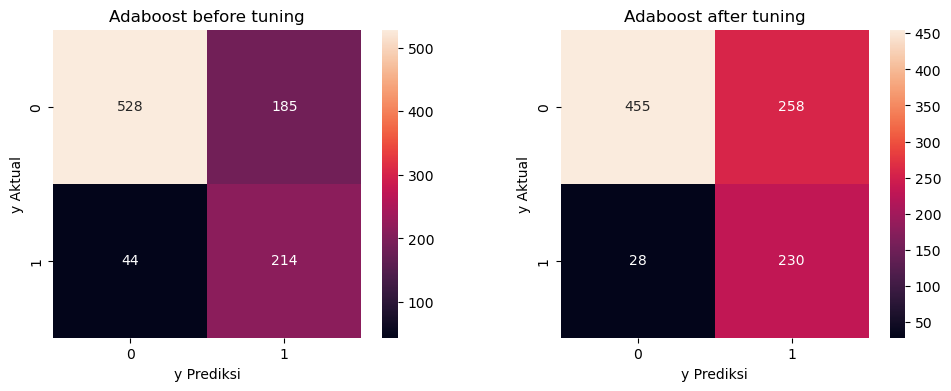

In [60]:
plt.figure(figsize=(12,4))

# Model Adaboost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost before tuning')

# Model Adaboost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_predict_binary_tuned), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost after tuning');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model Adaboost yang telah kita buat didapati:

Jumlah pelanggan yang aktualnya churn dan diprediksi akan churn (True Positive) : 230 orang
Jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 28 orang
Jumlah pelanggan yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 455 orang
Jumlah pelanggan yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 258 orang
Jumlah pelanggan yang diprediksi akan churn sebanyak 230 + 28 = 258 orang
Jumlah pelanggan yang diprediksi tidak akan churn sebanyak 455 + 258 = 713 orang

# **9. Feature Importance**

Mari kita lihat fitu / kolom apa saja yang penting untuk model Adaboost kita

,feature,importance,stdev
1,tenure,0.025502,0.006346
4,InternetService,0.019268,0.004845
7,Contract,0.018290,0.003967
0,Dependents,0.000000,0.000000
2,OnlineSecurity,0.000000,0.000000
9,MonthlyCharges,0.000000,0.000000
8,PaperlessBilling,-0.008295,0.001896
5,DeviceProtection,-0.009789,0.001962
3,OnlineBackup,-0.010768,0.001688
6,TechSupport,-0.010768,0.001688


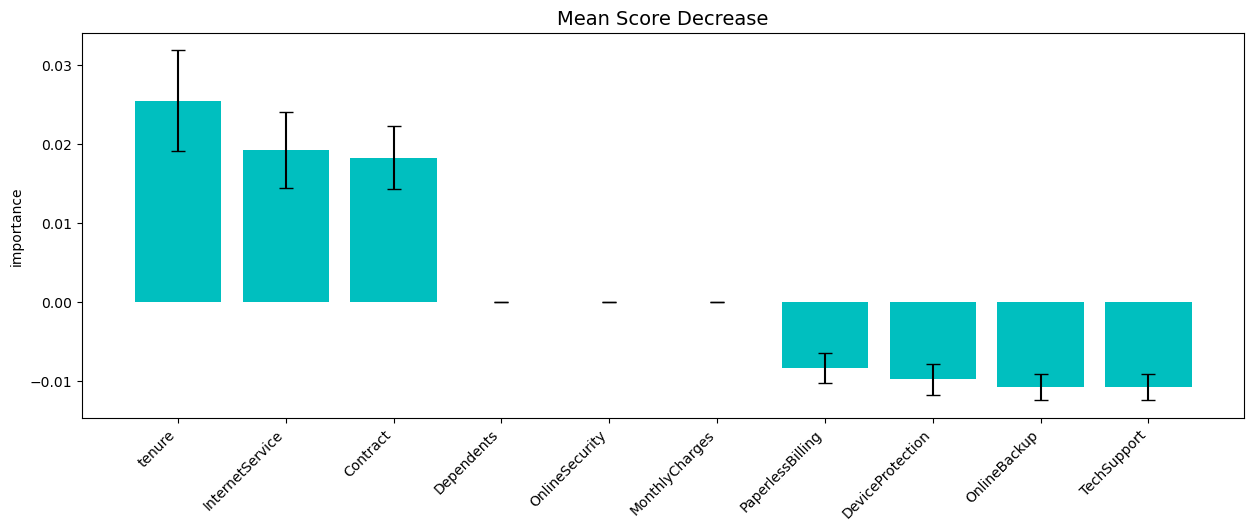

In [61]:
from jcopml.feature_importance import mean_score_decrease

mean_score_decrease(x_train, y_train, best_model, plot=True)



Terlihat bahwa ternyata untuk model Adaboost kita, fitur/kolom `tenure` adalah yang paling penting, kemudian diikuti dengan `InternetService`, `Contract`, dan selanjutnya.

Lalu feature `TechSupport`, `OnlineBackup`, `Device` merupakan feature yang kurang penting.

- mengingat hasil EDA diatas, untuk `tenure`, banyak pelanggan yang churn jika mereka sudah berlangganan dengan jangka waktu yang lama.

- lalu untuk feature `InternetService` banyak pelanggan yang churn adalah pelanggan yang tidak berlangganan internet service pada perusahaan.

- dan feature `Contract` memang paling banyak pengaruhnya terhadap target kita (churn), dimana jika pelanggan hanya contract bulanan banyak yang pada akhirnya churn daripada yang contract satu tahun atau 2 tahun.



# **10. Saving Final Tuning to Pickle**

In [65]:
# best model
adab_tuning = gridsearch1.best_estimator_

# fitting
adab_tuning.fit(x,y)

# save dengan pickle
pickle.dump(adab_tuning, open('best_adaboost_capstone.sav','wb'))

In [66]:
# Save model

adab_tuned = gridsearch1.best_estimator_
adab_tuned.fit(x_train, y_train)

pickle.dump(adab_tuned, open('best_adaboost_capstone_1.sav', 'wb'))

## **11. Conclusion & Recommendation**

### Conclusion

In [64]:
print('Classification Report Tuned Adaboost : \n', report_tuned)

Classification Report Tuned Adaboost : 
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       713
           1       0.47      0.89      0.62       258

    accuracy                           0.71       971
   macro avg       0.71      0.76      0.69       971
weighted avg       0.82      0.71      0.72       971



Berdasarkan nilai recall pada classification report dari model yang kita pilih, kita dapat menyimpulkan /mengambil konklusi bahwa dengan menggunakan model yang dibuat, perusahaan dapat mengurangi 64% pelanggan yang tidak churn untuk tidak kita berikan insentif sebagai bagian untuk mempertahankan pelanggan. Selain itu, perusahaan bisa mendapatkan 89% pelanggan yang akan churn untuk lebih kita maksimalkan dalam memberikan insentif untuk mencegah terjadinya churn.

Model kita ini memiliki ketepatan prediksi pelanggan yang akan churn sebesar 47%, jadi setiap model kita memprediksi bahwa seorang pelanggan yang akan churn adalah 47%. Sehingga masih akan ada pelanggan yang sebetulnya tidak akan churn namun diprediksi akan churn sebesar 42% (berdasarkan nilai recall - nilai precision) dari keseluruhan pelanggan yang tidak churn.

Bila seandainya biaya untuk acquaire pelanggan baru 315$ (berdasarkan sumber dari https://www.revechat.com/blog/customer-acquisition-cost/), dan andaikan jumlah pelanggan yang kita miliki untuk suatu kurun waktu sebanyak 4000 orang (dimana andaikan 2000 orang tertarik, dan 2000 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua kandidat kita check dan tawarkan) :
- Total Biaya => 4000 x 315 USD = 1.260.000 USD
- Total pelanggan Tertarik yang didapatkan => 2000 orang (karena semua kita tawarkan)
- Total pelanggan Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 2000 x 315 USD = 630.000 USD (karena 2000 orang churn dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya pelanggan yang diprediksi oleh model tertarik yang kita check dan tawarkan) :
- Total Biaya => (1780 x 315 USD) + (840 x 315 USD) = 560.700 USD + 264.600 USD =  825.300 USD
- Total Kandidat Tertarik yang didapatkan => 1780 orang (karena recall 1/yg tertarik itu 89%)
- Total Kandidat Tertarik yang tidak didapatkan => 840 orang (karena recall 1/yg tertarik itu 89%)
- Biaya yang terbuang => 840 x 315 USD = 264.600 USD (berdasarkan recall 0/yg tidak tertarik (280 orang menolak tawaran/tidak tertarik))
- Jumlah penghematan => 1280 x 315 USD = 403.200 USD (yang dihitung hanya yang memang tidak tertarik saja, kalau yang tertarik tapi tidak ditawarkan itu tidak dihitung disini)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah pelanggan yang tertarik.

### Recommendation

ada beberapa rekomendasi yang dapat dilakukan untuk mengembangkan model agar lebih baik, seperti:
1. membuat kebijakan baru yang mendorong pelanggan untuk tetap loyal dengan perusahaan seperti memberikan insentif atau reward yang menarik bagi pelanggan untuk beralih dari `Contract` Month - to - Month ke `Contract` satu tahun atau dua tahun.
2. Menambahkan fitur atau atribut baru yang kemungkinan bisa berhubungan dengan ketertarikan pelanggan, seperti menambahkan layanan tv kabel, bonus tambahan seperti jika sudah berlangganan Fiber Optik maka secara gratis mendapatkan device protection, pelayanan Tech support kepada seluruh pelanggan, dll.
3. Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, dapat dicoba seperti menggunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, dll. 
4. Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.

# Thank You